# **K-Nearest Neighbors algorithm on the Iris Dataset**

This script describes my application of the K-Nearest Neighbors (KNN) algorithm to the Iris flower dataset for classification. The Iris dataset contains four features: sepal length, sepal width, petal length, and petal width, which I use to classify three different species of Iris flowers: Setosa, Versicolor, and Virginica.

I split the dataset into training and test sets, using 70% of the data for training and 30% for testing. I train a KNN classifier using the training data and evaluate its performance using the test data. The classification is based on the 5 nearest neighbors, with the distance weighted by proximity.

I visualize the results of the KNN classification by plotting the decision boundaries for various feature pairs. This visualization helps me understand how the model differentiates between the classes based on different features. I evaluate the performance of the KNN model using precision, recall, and F1-score metrics on both the training and test datasets. My goal is to explore the effectiveness of KNN in classifying Iris species and to examine the model’s generalization ability on unseen data.

# 1. Import data

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/govinda-lienart/iris_dataset/refs/heads/main/iris.csv')

In [5]:
df.rename(columns={'variety': 'species'}, inplace=True)

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 2. Visualize data

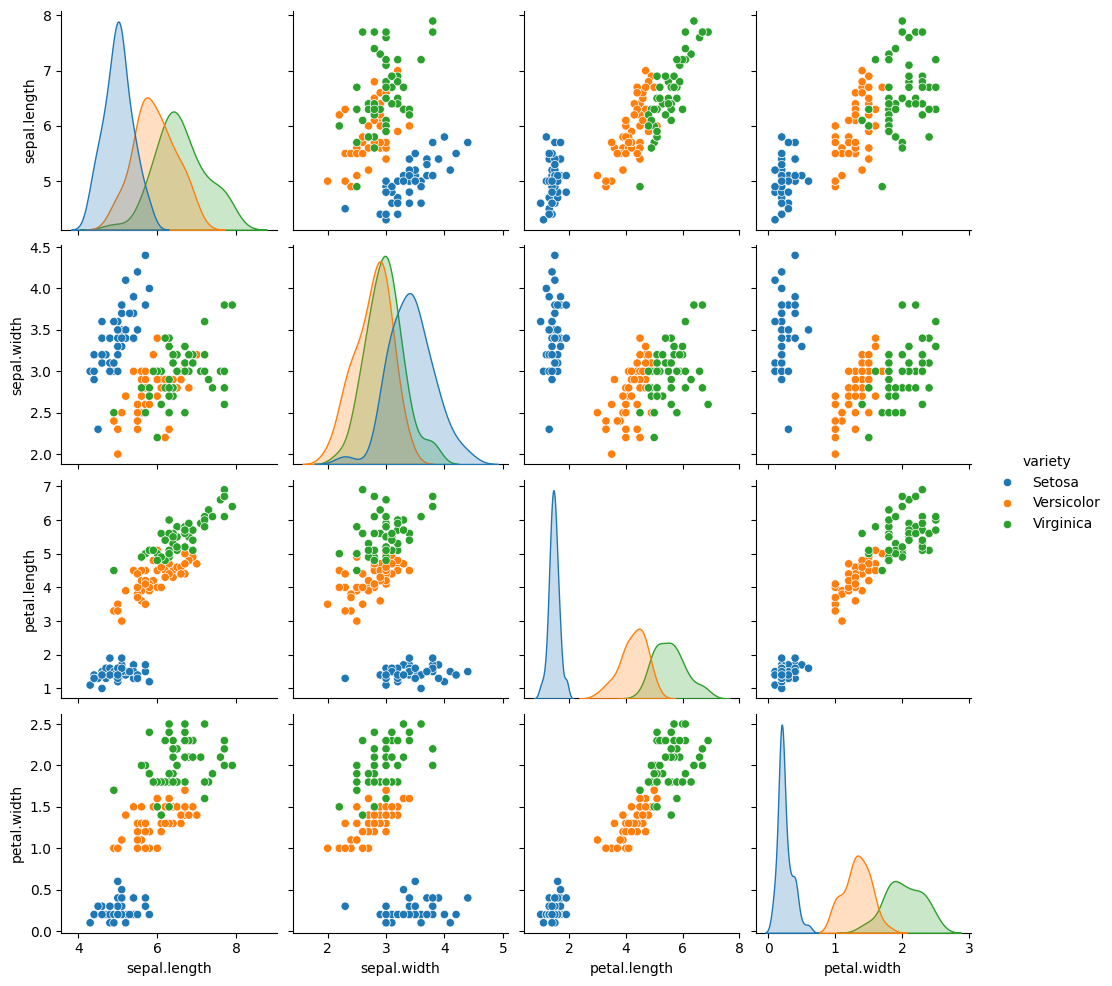

In [ ]:
sns.pairplot(df, hue="variety")

# 3. Preprocess data

In [7]:
df.isna().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
species,0


No missing data

# 4. Split training & test data



1. **`X, y = df.drop("species", axis=1), df["species"]`**  
   - In this line, I use `df.drop("species", axis=1)` to remove the `"species"` column from the DataFrame `df`. The `"species"` column is the target variable, and the rest of the columns represent the input features (i.e., the data I will use to make predictions).
   - `df["species"]` selects the `"species"` column, which contains the target labels for the Iris flower species.
   - Therefore, `X` contains the features (sepal length, sepal width, petal length, petal width), and `y` contains the target labels (the species of the Iris flowers).

2. **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)`**  
   - This line splits the data into training and testing sets using `train_test_split` from `sklearn.model_selection`.
   - `X` and `y` are passed as the input features and target labels, respectively.
   - `test_size=0.3` specifies that 30% of the data will be allocated to the test set, and the remaining 70% will be used for training.
   - `random_state=42` ensures the random splitting of data is reproducible. The number 42 is a random seed for the generator.
   - `shuffle=True` ensures that the data is shuffled before being split, which helps avoid any bias that might arise from the order of the data.

As a result, `X_train` and `y_train` will hold the training features and labels, while `X_test` and `y_test` will hold the testing features and labels. This allows me to train the model on the training set and evaluate its performance on the test set.

In [11]:
from sklearn.model_selection import train_test_split
X, y = df.drop("species", axis=1), df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# 5. K-Nearest Neighbors

In simple terms, Codesnippet 5.1 defines a function to allow visualize the decision boundaries of a K-Nearest Neighbors (KNN) model, showing how it classifies different data points based on their features. Codesnippet 5.2 creates and trains the KNN model using training data (features and labels). Code 5.3 uses the trained KNN model from Code 5.2, passing its settings to the function from Code 5.1, allowing it to visualize the model’s decision boundaries and show how the model classifies data points. Essentially, Code 5.1 sets up the visualization, Code 2 trains the model, and Code 5.3 uses both to display how the model works.

## code snippet 5.1: Preparing Visualizations for Decision Boundaries in K-Nearest Neighbors (KNN) Classification on the Iris Dataset

The decision_boundaries function begins by iterating over all unique pairs of features (two at a time), creating a two-dimensional plane for each pair. For example, one pair might be petal length vs. petal width, and another might be sepal length vs. sepal width. This pairing reduces the dataset’s four-dimensional space into manageable two-dimensional plots, allowing us to visualize the decision-making process in a way that is comprehensible to the human eye. While the actual KNN model for predictions operates in the full 4D feature space, these 2D plots act as projections or slices of the higher-dimensional decision boundaries, providing insights into the relationships between feature pairs.

Within each feature pair, the KNN classifier is trained using only those two features. For instance, if the pair is petal length and petal width, the classifier will only consider these two features when making predictions. This localized training provides a glimpse into how the decision boundaries would look if only two features were used, offering an intuitive understanding of their contribution to classification. The function then generates a grid of simulated points across the feature space using np.meshgrid. Each point in this grid acts as a simulated data point, not part of the original dataset, allowing the classifier to predict and map regions for each species.

For each grid point, the classifier predicts the species (class) based on the KNN model. The decision is visualized by coloring the region surrounding the point according to the predicted class. This creates a map-like boundary where each color represents a distinct flower species. For instance, a region might be shaded red for Setosa, yellow for Versicolor, or blue for Virginica, based on the classifier’s output. This continuous mapping shows how the KNN model carves out decision regions in the feature space.

Finally, the actual data points from the Iris dataset are overlaid onto these decision regions. Each flower species (Setosa, Versicolor, Virginica) is represented by a different color (ryb for red, yellow, and blue), and the points are outlined in black for clarity. The resulting visualization illustrates how the classifier splits the feature space into regions associated with each class.

This method provides insight into how well the model distinguishes between classes based on each pair of features and helps identify which feature combinations are most effective for classification. It demonstrates the interplay of the dataset’s features and highlights potential overlaps or separations in the classification boundaries. While the full KNN model uses all four features simultaneously for predictions, these 2D visualizations highlight the impact and utility of individual feature pairs, bridging the gap between complex high-dimensional decisions and intuitive understanding.

*note*: The provided script defines the decision_boundaries function, which is a tool designed to visualize how a classifier, such as a K-Nearest Neighbors (KNN) model, creates decision boundaries for each pair of features in a dataset, like the Iris flower dataset. However, this function itself does not train a model or include a predefined classifier. Instead, it temporarily trains a model within the loop using two features at a time, enabling it to generate 2D decision boundary plots for those features. To use this function, you first need to train a classifier, such as knn_iris, on the complete dataset. Once the classifier is trained, you pass the dataset and model configuration into the function as arguments. The function then creates visualizations that show how the classifier predicts classes based on the two selected features, illustrating the regions of influence for each class. This function is a visualization step, enabling a deeper understanding of the classifier’s decision-making process.

In [12]:
from sklearn.preprocessing import OrdinalEncoder

# Define global parameters
offset = 1
step = 0.02

def decision_boundaries(X: pd.DataFrame, y: pd.Series, **kwargs) -> None:
    """
    Plots the decision boundaries related to the iris dataset.
    """
    plt.figure(figsize=(15, 10))
    index, n_features = 1, X.columns.values
    oe = OrdinalEncoder().fit(y.values.reshape(-1, 1))
    for i in range(n_features.size):
        for j in range(n_features.size):
            if i>j:
                X_ = X[[n_features[i], n_features[j]]]
                dt_ = KNeighborsClassifier(**kwargs).fit(X_, y)

                plt.subplot(2, 3, index)
                plt.xlabel(n_features[i])
                plt.ylabel(n_features[j])
                x_min, x_max = X_.values[:, 0].min() - 1, X_.values[:, 0].max() + 1
                y_min, y_max = X_.values[:, 1].min() - 1, X_.values[:, 1].max() + 1

                # generate meshgrid & predict classes
                xx, yy = np.meshgrid(
                    np.arange(x_min, x_max, step),
                    np.arange(y_min, y_max, step)
                )
                plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
                Z = dt_.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                shape = Z.shape
                # plot decision boundaries
                cs = plt.contourf(xx, yy, oe.transform(Z.reshape(-1, 1)).reshape(shape), cmap=plt.cm.RdYlBu)

                # plot training points
                color = "ryb"
                for cat in oe.categories_[0]:
                    c = np.where(oe.categories_[0] == cat)[0]
                    idx = y[y == cat].index
                    plt.scatter(X_.loc[idx][n_features[i]].values,
                                X_.loc[idx][n_features[j]].values,
                                c=color[c[0]], label=np.unique(y),
                                cmap=plt.cm.RdYlBu, edgecolor="black", s=25, linewidths=2.0)
                index += 1

This code initializes and trains a K-Nearest Neighbors (KNN) classifier for the Iris dataset. The classifier considers the 5 nearest neighbors (n_neighbors=5) to classify a data point, using their proximity to influence the decision. It employs distance-based weighting (weights="distance"), giving more influence to neighbors closer to the point being classified. This ensures that closer points carry more weight in the classification decision compared to farther ones. The parameter p=2 specifies the Euclidean distance as the metric to calculate proximity, which measures the straight-line distance between points in the feature space. Once initialized, the model is trained on the dataset (knn_iris.fit(X_train, y_train)), learning the relationships between features and classes to classify new observations effectively.

# code snippet 5.2: Training the K-Nearest Neighbors Classifier on the Iris Dataset

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_iris = KNeighborsClassifier(n_neighbors=5, weights="distance", p=2)
knn_iris.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

The code decision_boundaries(X_train, y_train, **knn_iris.get_params()) combines the function decision_boundaries (from your first code snippet) and the KNN model (knn_iris) to plot the decision boundaries of the trained KNN classifier.


# code snippet 5.3: Visualizing Decision Boundaries using K-Nearest Neighbors Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-12-c6ce58fce6cd>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_.loc[idx][n_features[i]].values,
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-12-c6ce58fce6cd>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_.loc[idx][n_features[i]].values,
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-12-c6ce58fce6cd>:43: UserWarning: No data for c

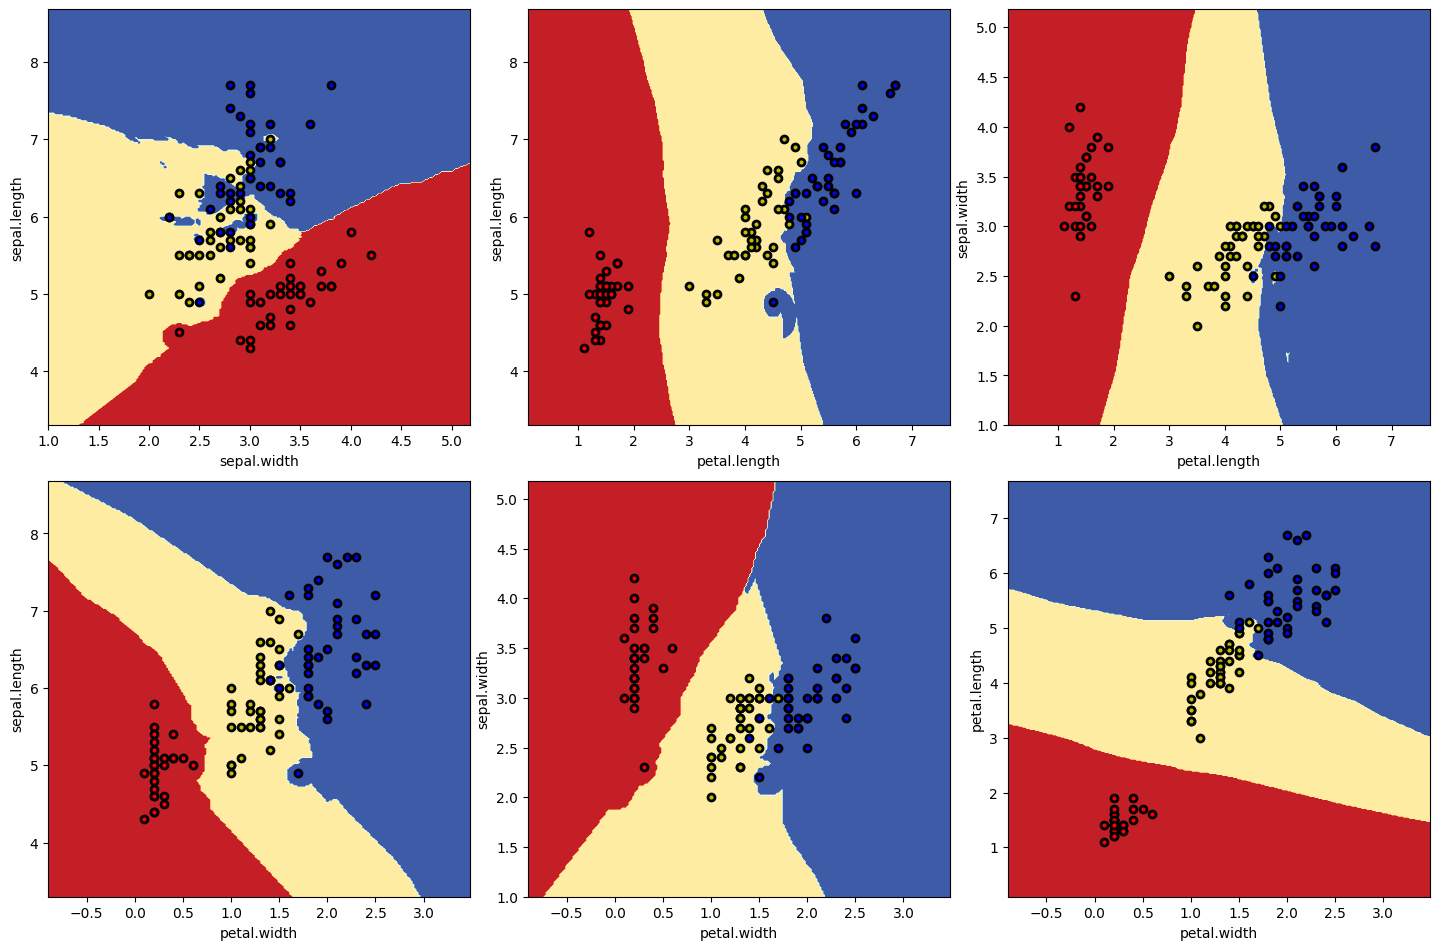

In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

decision_boundaries(X_train, y_train, **knn_iris.get_params())


In summary, these plots help us understand how the KNN classifier is making decisions based on different feature combinations, with the goal of separating the data into regions that are as homogeneous as possible with respect to species. The visualized boundaries show where the model changes its classification between Iris species.

# 6. Evaluate model

In [20]:
from sklearn.metrics import classification_report

> The line y_pred = knn_iris.predict(X_test) applies the trained K-Nearest Neighbors (KNN) model, knn_iris, to the test dataset X_test to predict the class labels for unseen data. For each sample in X_test, the model identifies its five nearest neighbors in the training data using the specified distance metric (Euclidean in this case). Depending on the model’s weighting strategy, the neighbors either contribute equally (uniform weighting) or are weighted by their proximity (distance weighting). Based on the majority vote from these neighbors, the model assigns a class (Setosa, Versicolor, or Virginica) to each test sample, storing the predictions in y_pred. This process helps evaluate the model’s ability to generalize to new, unseen data.

In [21]:
y_pred = knn_iris.predict(X_test)

In [22]:
# assess performance on train set
report = classification_report(y_true=y_train, y_pred=knn_iris.predict(X_train), target_names=["Setosa", "Versicolor", "Virginica"])
print(report)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        31
  Versicolor       1.00      1.00      1.00        37
   Virginica       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [23]:
# assess performance on test set
report = classification_report(y_true=y_test, y_pred=y_pred, target_names=["Setosa", "Versicolor", "Virginica"])
print(report)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



The results indicate that the K-Nearest Neighbors (KNN) classifier performs excellently on both the training and test sets. On the training set, the model achieves perfect precision, recall, and F1-score for all three classes (Setosa, Versicolor, and Virginica), with an overall accuracy of 1.00. This suggests that the model has perfectly learned the relationships in the training data, potentially indicating overfitting. On the test set, the model still maintains perfect performance with an accuracy of 1.00, showing that the model generalizes well to unseen data. This consistency between the training and test sets suggests that the model is robust and does not suffer from significant overfitting, even though perfect performance on both is unusual and warrants further validation to ensure robustness.

## 7. Conclusions

Limitations of the Iris dataset due to its small size and how this affects the model’s performance and evaluation:

1. Small Dataset: The dataset contains only 150 samples, split into 105 for
training and 45 for testing. Such a small number of data points makes it relatively easy for the K-Nearest Neighbors (KNN) model to “memorize” the dataset, leading to high accuracy on both the training and test sets.

2. Perfect Fit: The model performs exceptionally well on this dataset because there isn’t enough complexity or variability in the data to challenge it. This high performance could mask potential overfitting or deficiencies in the model since both the training and test data are too simple for the model to struggle.

3. Overfitted Spots: In the decision boundaries (the regions where the model predicts class labels), the “overfitted spots” refer to very detailed and specific regions where the decision boundaries may become overly complex, perfectly accommodating every single training point. While these areas might indicate overfitting in larger or more complex datasets, they have no impact here because the test set also aligns well with the training data.